In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, recall_score,accuracy_score,f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
from matplotlib import pyplot
warnings.filterwarnings("ignore")

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
heart.duplicated().sum()

0

In [5]:
heart['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [6]:
heart['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [7]:
heart['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [8]:
heart['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

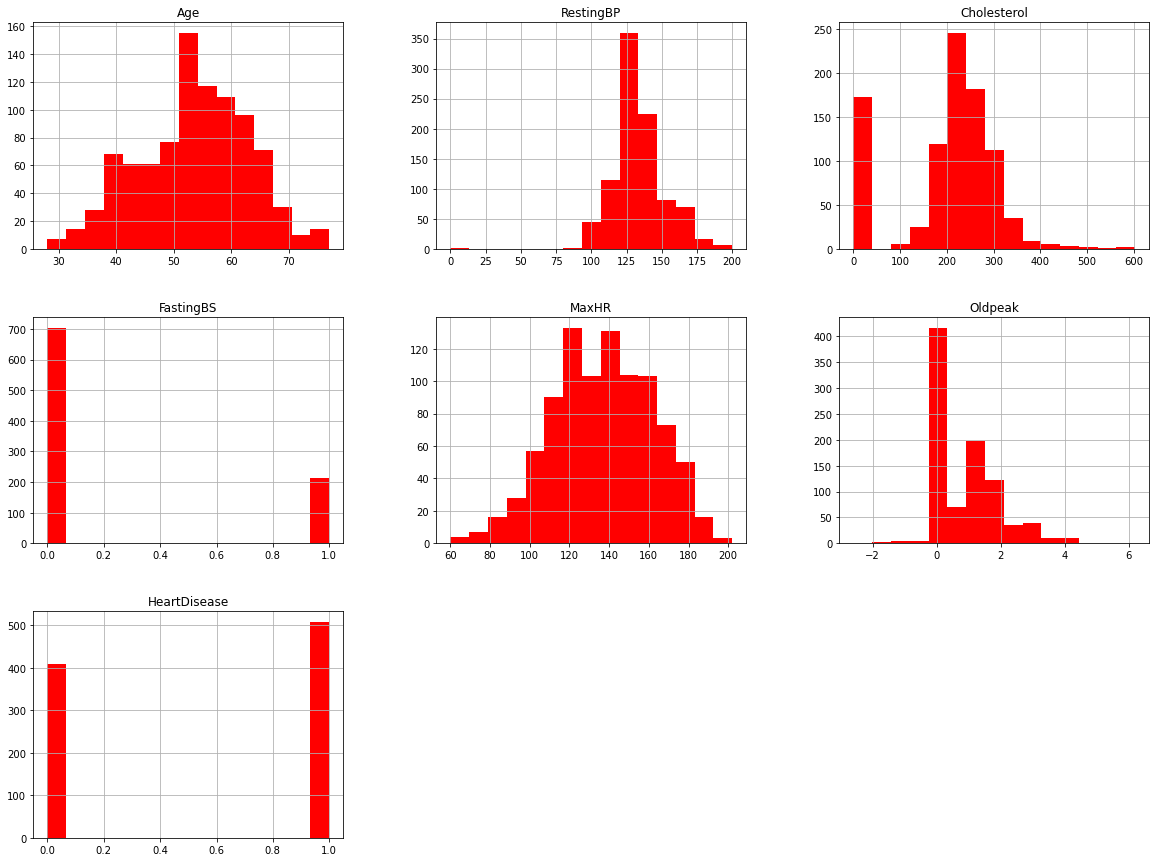

In [9]:
heart.hist(figsize=(20,15), bins=15,color="Red")

<AxesSubplot:>

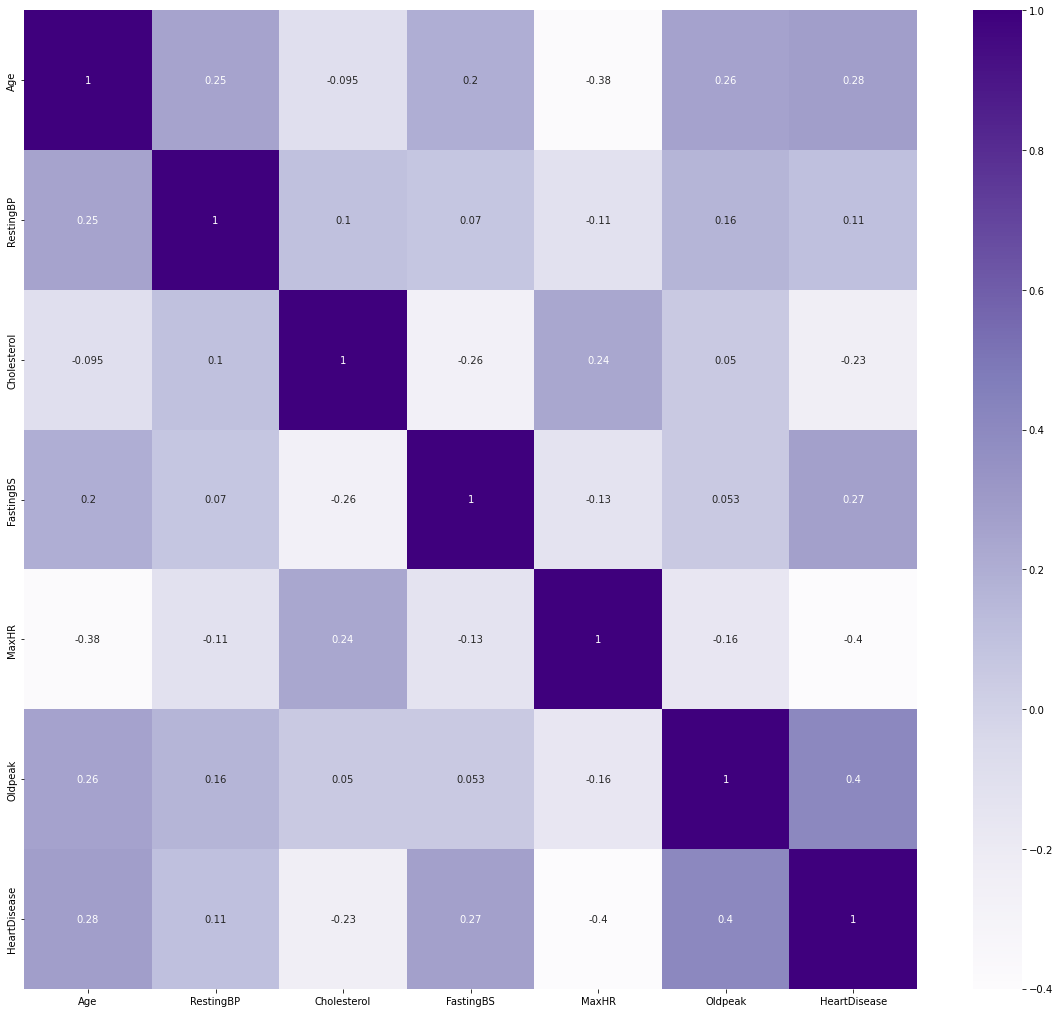

In [10]:
plt.figure(figsize=(20,18))
sns.heatmap(heart.corr(),annot=True, cmap="Purples")

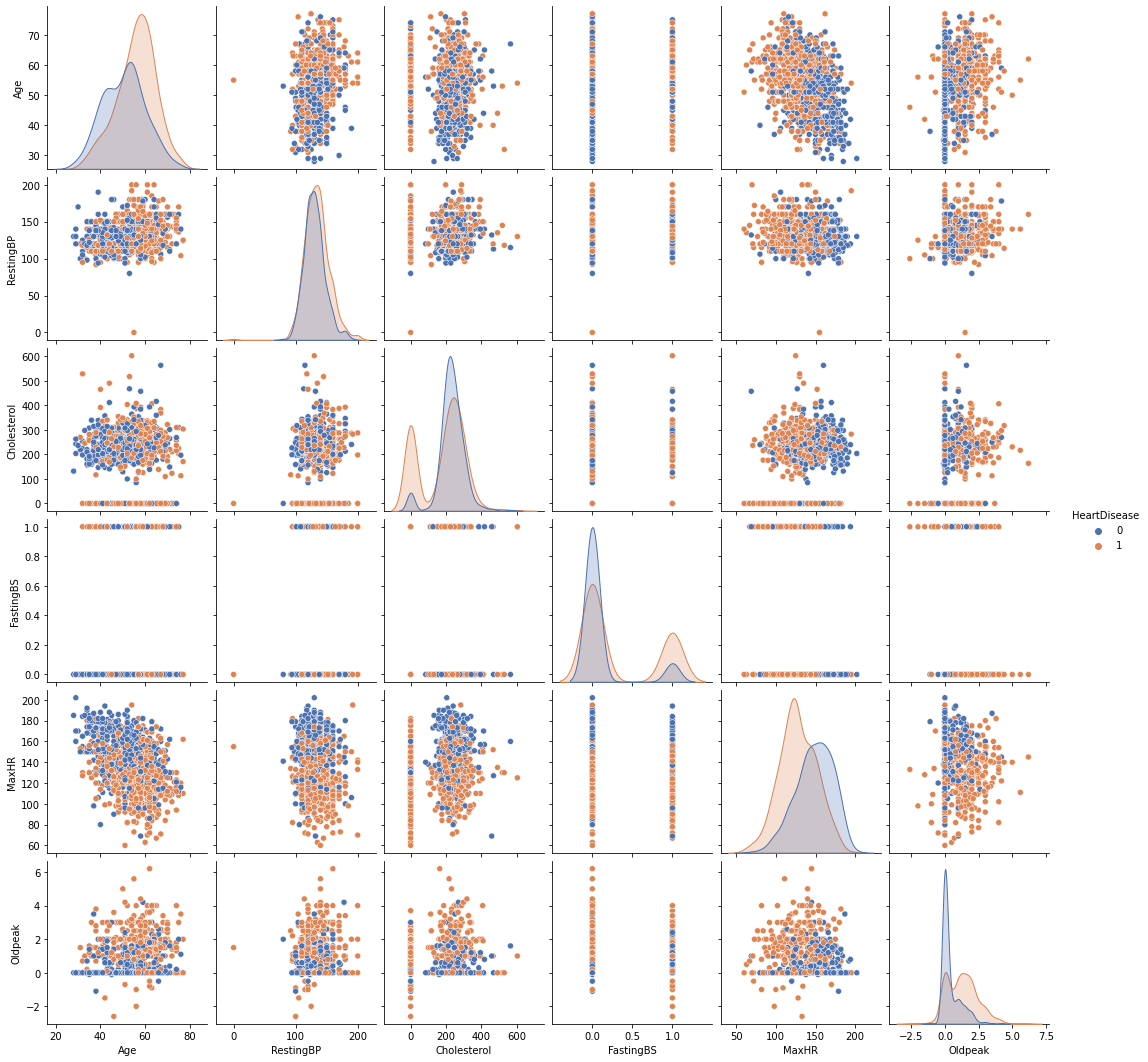

In [11]:
sctr = sns.pairplot(heart,hue="HeartDisease",palette="deep")

In [12]:
#onehotencoding
z=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for j in z:
    x,y=pd.factorize(heart[j])
    heart[j]=x
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [13]:
heart_cl= heart

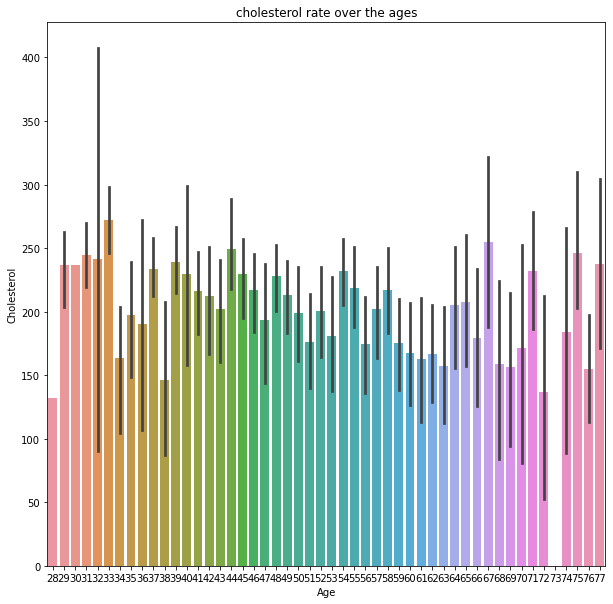

In [14]:
ag=heart_cl["Age"]
vd=heart_cl["Cholesterol"]
plt.figure(figsize=(10,10))
sns.barplot(y=vd,x=ag)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('cholesterol rate over the ages')
plt.show()

## Spliting dataset into test and train dataset


In [15]:
X = heart_cl.values[:,0:11]
y = heart_cl.values[:,11]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

### Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

## SVM 

In [18]:
svc= SVC()
parameters = {
    "kernel": ["linear","rbf", "poly", "sigmoid"],
    "C":[0.1,1,10]
}
cv = GridSearchCV(svc,parameters,cv=5)
cv.fit(X_train, y_train)
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'C': 1, 'kernel': 'rbf'}


In [19]:
SVM = SVC(C=1.0, kernel='linear', random_state=1)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
svm_acc = accuracy_score(y_true=y_test, y_pred=SVM.predict(X_test))

In [20]:
print("SVM Metrics:")
print('----------------------------------------------------')
print('Accuracy Score on train data:', svm_acc)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification report")
print(classification_report(y_test, y_pred))

SVM Metrics:
----------------------------------------------------
Accuracy Score on train data: 0.8347826086956521
Confusion matrix:
[[ 84  25]
 [ 13 108]]
classification report
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82       109
         1.0       0.81      0.89      0.85       121

    accuracy                           0.83       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230



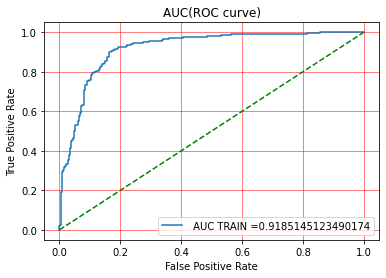

In [21]:
y_tr_pred = SVM.decision_function(X_train)    
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_tr_pred)
plt.grid()
plt.plot(tr_fpr, tr_tpr, label=" AUC TRAIN ="+str(auc(tr_fpr, tr_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='red', linestyle='-', linewidth=0.5)
plt.show()


## Decision Tree

In [22]:
DTree = DecisionTreeClassifier(criterion = 'gini', random_state=47)
DTree.fit(X_train, y_train)
y_pred =  DTree.predict(X_test)
dt_acc = accuracy_score(y_true=y_test, y_pred=DTree.predict(X_test))

In [23]:
print("Accuracy Score:", dt_acc)
print('------------------------------------')
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7782608695652173
------------------------------------
Confusion matrix:
[[ 77  32]
 [ 19 102]]
classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       109
         1.0       0.76      0.84      0.80       121

    accuracy                           0.78       230
   macro avg       0.78      0.77      0.78       230
weighted avg       0.78      0.78      0.78       230



### Decision plot

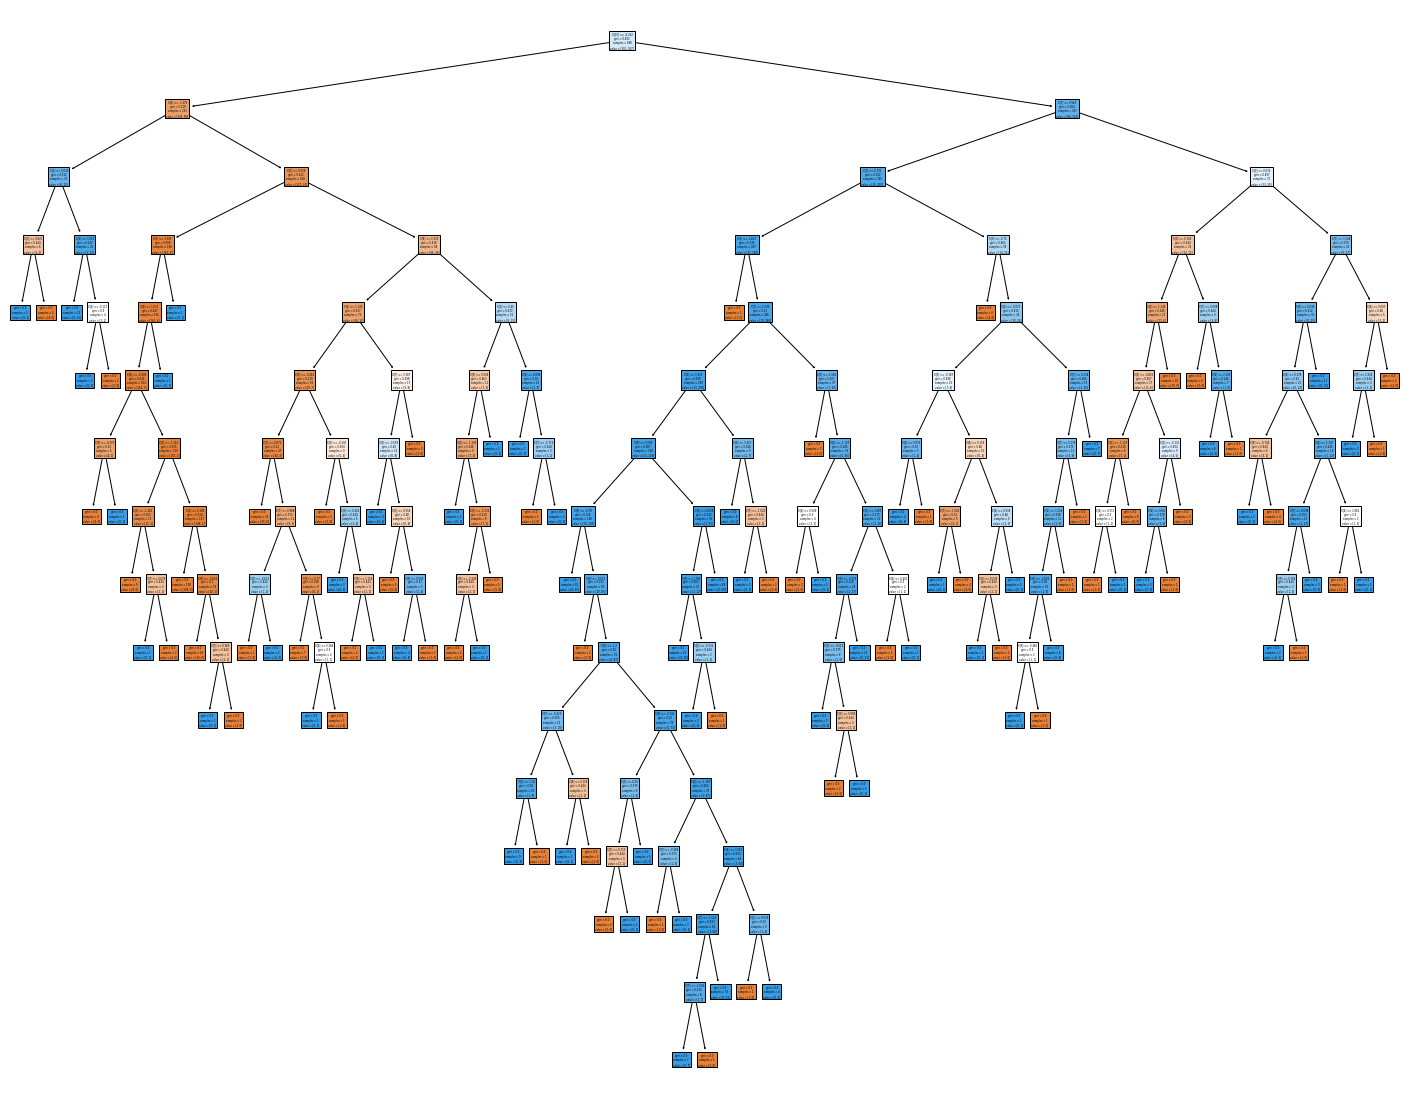

In [24]:
figure = plt.figure(figsize=(25,20))
plot = tree.plot_tree(DTree, 
                   filled=True)

## MLP

In [25]:
MLP = MLPClassifier(random_state=47, max_iter=100)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)
mlp_acc =  accuracy_score(y_true=y_test, y_pred=MLP.predict(X_test))

In [26]:
print('Accuracy Score:',mlp_acc)
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8565217391304348
Confusion matrix: [[ 86  23]
 [ 10 111]]
classification report:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       109
         1.0       0.83      0.92      0.87       121

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



In [27]:
mlp_cv = MLPClassifier(max_iter=100)
parameter_s = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
cv_mlp = GridSearchCV(mlp_cv, parameter_s, n_jobs=-1, cv=5)
cv_mlp.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [28]:
print('Best parameters found:\n', cv_mlp.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [29]:
means = cv_mlp.cv_results_['mean_test_score']
stds = cv_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, cv_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.592 (+/-0.134) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.644 (+/-0.169) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.625 (+/-0.214) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.628 (+/-0.070) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.597 (+/-0.229) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.668 (+/-0.145) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.669 (+/-0.056) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.718 (+/-0.182) 

In [31]:
y_true,ypred=y_test, MLP.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       109
         1.0       0.83      0.92      0.87       121

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



## Naive Bayes

In [32]:
NB = GaussianNB(var_smoothing=5.336699231206313e-06)
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
nb_acc = accuracy_score(y_true=y_test, y_pred=NB.predict(X_test))

In [33]:
print('Accuracy Score on test data:', nb_acc)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Accuracy Score on test data: 0.808695652173913
Confusion matrix: [[ 84  25]
 [ 19 102]]
classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       109
         1.0       0.80      0.84      0.82       121

    accuracy                           0.81       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.81      0.81      0.81       230



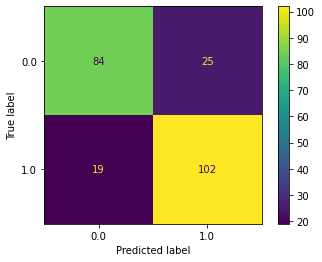

In [34]:
plot_confusion_matrix(NB, X_test, y_test)
plt.show()

### using GRID SEARCH CV to get the best hyper-parameters

In [35]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.8111308307896871)


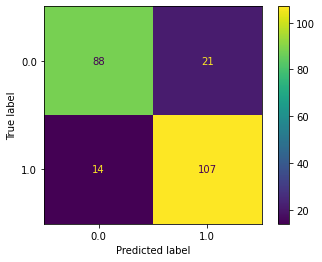

Acc 0.8478260869565217


In [36]:
score=[]
for i in range(1,50):
    knnalgo=KNeighborsClassifier(n_neighbors=i)
    knnalgo.fit(X_train,y_train)
    y_pred=knnalgo.predict(X_test)
    temp=mean_squared_error(y_test,y_pred)
    score.append(temp)
    
knnalgo=KNeighborsClassifier(n_neighbors=26)
knnalgo.fit(X_train, y_train)
y_pred = knnalgo.predict(X_test)
knn_acc = accuracy_score(y_true=y_test, y_pred=knnalgo.predict(X_test))
temp=mean_squared_error(y_test, y_pred)
plot_confusion_matrix(knnalgo, X_test, y_test)
plt.show()
print("Acc",knn_acc)

### Comparing the algorithms used in this dataset

### Histogram

In [37]:
algorithms = ["SVM", "DECISION TREE", "MLP", "NAIVE BAYES","KNN"]
accuracies = [svm_acc, dt_acc, mlp_acc, nb_acc,knn_acc]
print(accuracies)

[0.8347826086956521, 0.7782608695652173, 0.8565217391304348, 0.808695652173913, 0.8478260869565217]


Text(0, 0.5, 'Sequential')

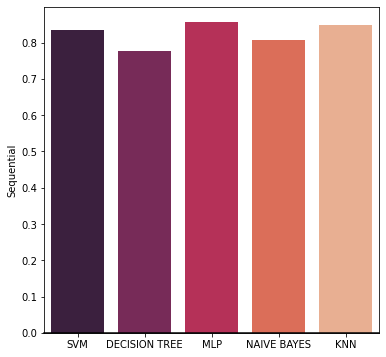

In [38]:
f, ax = plt.subplots(figsize=(6, 6))
x = algorithms
y1 = accuracies
sns.barplot(x=x, y=y1, palette="rocket", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Sequential")

In [39]:
data1 = {"Classification Algorithms": ["SVM Classifier", "Decision Tree Classifier", "MLP Classifier", "Naive Bayes Classifier","KNN Classifier"],
      "Accuracy Score": [SVM.score(X_test,y_test), DTree.score(X_test,y_test), mlp_acc,
                NB.score(X_test,y_test),knn_acc ],
       "Recall":[(recall_score(y_true=y_test, y_pred=SVM.predict(X_test))),(recall_score(y_true=y_test, y_pred=DTree.predict(X_test))),(recall_score(y_true=y_test, y_pred=MLP.predict(X_test))),(recall_score(y_true=y_test, y_pred=NB.predict(X_test))),(recall_score(y_true=y_test, y_pred=knnalgo.predict(X_test)))],
        "Precision":[(precision_score(y_true=y_test, y_pred=SVM.predict(X_test))),(precision_score(y_true=y_test, y_pred=DTree.predict(X_test))),(precision_score(y_true=y_test, y_pred=MLP.predict(X_test))),(precision_score(y_true=y_test, y_pred=NB.predict(X_test))),(precision_score(y_true=y_test, y_pred=knnalgo.predict(X_test)))],
        "F1-score":[(f1_score(y_true=y_test, y_pred=SVM.predict(X_test))),(f1_score(y_true=y_test, y_pred=DTree.predict(X_test))),(f1_score(y_true=y_test, y_pred=MLP.predict(X_test))),(f1_score(y_true=y_test, y_pred=NB.predict(X_test))),(f1_score(y_true=y_test, y_pred=knnalgo.predict(X_test)))]}
score = pd.DataFrame(data1)
score

,Classification Algorithms,Accuracy Score,Recall,Precision,F1-score
0,SVM Classifier,0.834783,0.892562,0.812030,0.850394
1,Decision Tree Classifier,0.778261,0.842975,0.761194,0.800000
2,MLP Classifier,0.856522,0.917355,0.828358,0.870588
3,Naive Bayes Classifier,0.808696,0.842975,0.803150,0.822581
4,KNN Classifier,0.847826,0.884298,0.835938,0.859438


### Cross validation score

In [41]:
# This code is referenced from MLDM lab.
models = []
models.append(('SVM', SVM))
models.append(('Decision Tree', DTree))
models.append(('MLP',mlp_cv))
models.append(('Naive Bayes', NB))
models.append(('KNN',knnalgo))

SVM: 0.856283 (0.051474)
Decision Tree: 0.776696 (0.058990)
MLP: 0.847587 (0.048890)
Naive Bayes: 0.856259 (0.045419)
KNN: 0.702616 (0.038285)


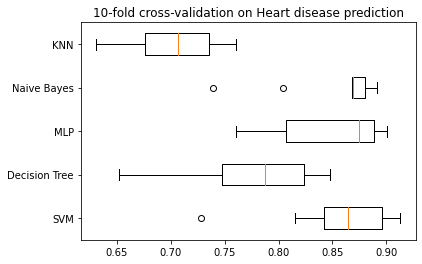

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle = True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names,vert=False)
pyplot.title('10-fold cross-validation on Heart disease prediction')
pyplot.show()

In [47]:
mod=[KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC(),MLPClassifier()]

### ROC

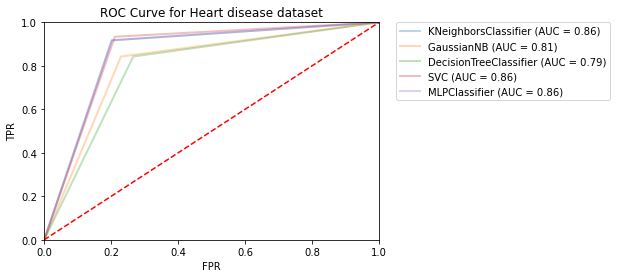

In [48]:
#ROC comparison
reg = 1
for p in mod:
    
    
    prediction = p.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, prediction)
    roc_auc_model = auc(fp, tp)
    model_name = p.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='%s (AUC = %0.2f)'  % (model_name, roc_auc_model))
   
    reg+=1

plt.title('ROC Curve for Heart disease dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')    
plt.show()

https://seaborn.pydata.org/examples/part_whole_bars.html

https://mljar.com/blog/visualize-decision-tree/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

nutrition dataset references

https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe